<a href="https://colab.research.google.com/github/saivishwanathgoud/MachineLearning/blob/master/Advanced_Statistics_PCA_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the necessary libraries.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1.	Read the ‘.csv’ file, check the data types of the different variables.Check for null values and remove them, if found. Drop any variables which are not required for the analysis. Then check the basic descriptive statistics of the continuous variables. 

### Reading the file

In [4]:
df = pd.read_csv('Marketing.csv')

### Checking for the data types of different variables with the .'info()' and the '.dtypes()' command.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [7]:
df.dtypes

ID                int64
ProdQual        float64
Ecom            float64
TechSup         float64
CompRes         float64
Advertising     float64
ProdLine        float64
SalesFImage     float64
ComPricing      float64
WartyClaim      float64
OrdBilling      float64
DelSpeed        float64
Satisfaction    float64
dtype: object

### Checking for the null values.

In [8]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

### Removing the 'ID' colummn.

In [9]:
 df.drop(['ID'], axis = 1, inplace = True)
 df.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


### Measures of descriptive statistics.

In [10]:
df.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


# 2. Plot the histograms and boxplots of the the variables.

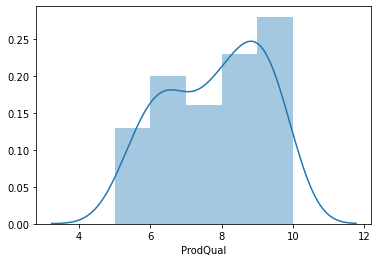

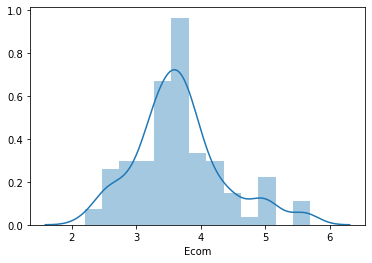

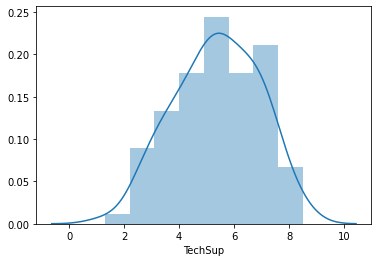

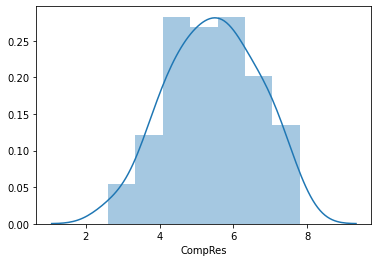

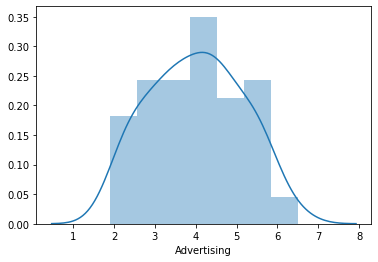

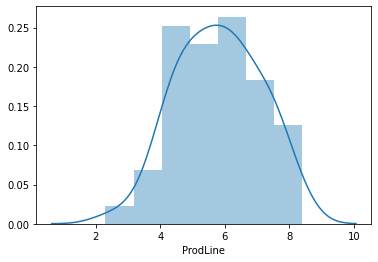

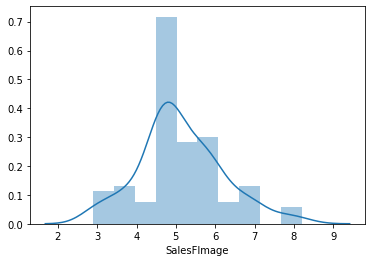

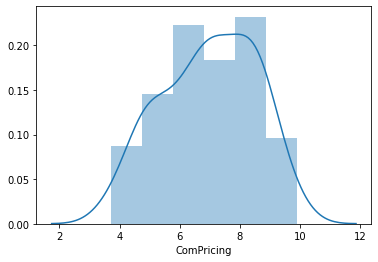

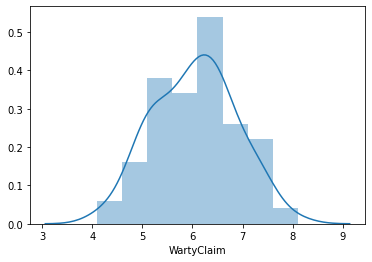

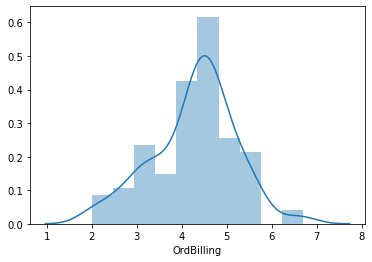

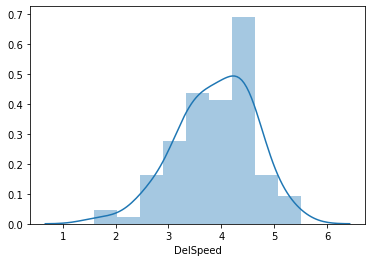

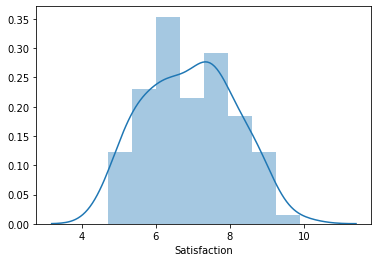

In [13]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

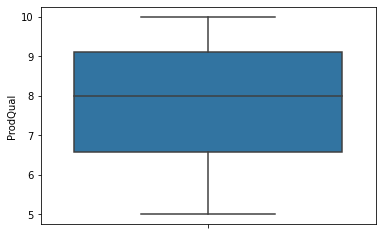

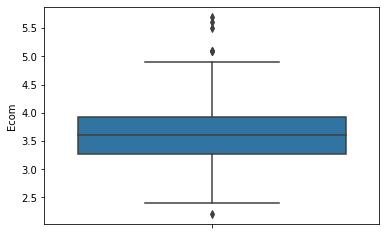

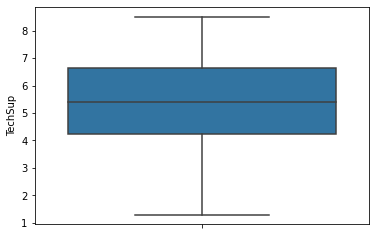

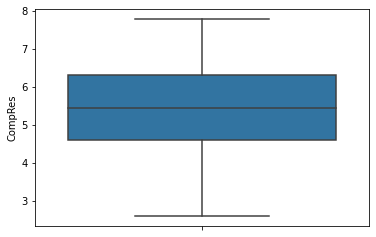

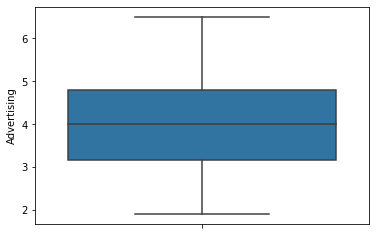

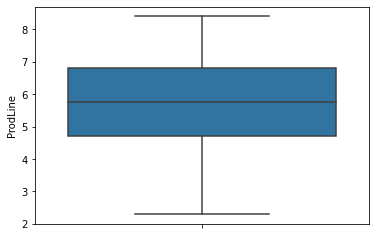

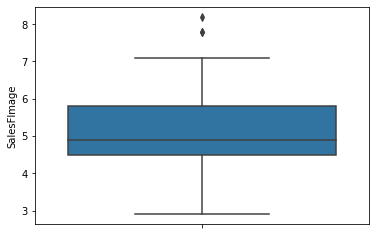

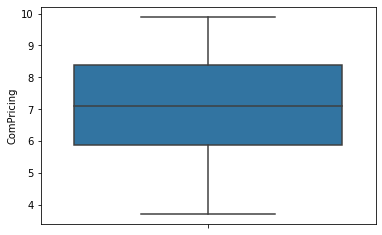

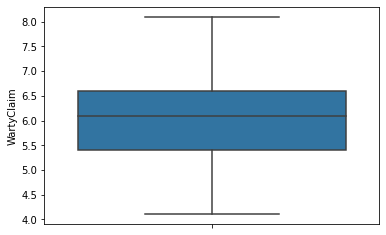

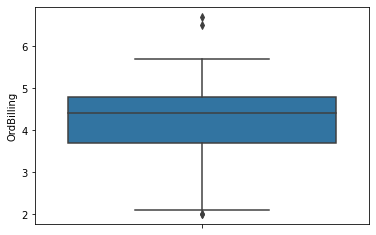

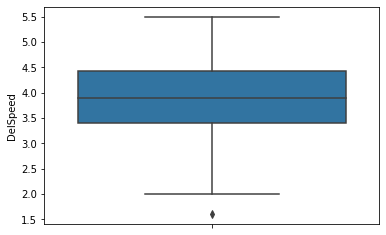

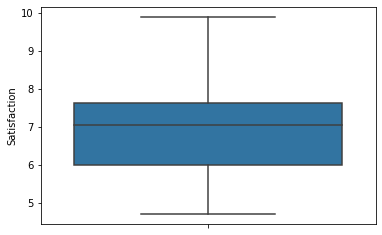

In [16]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(x = df[col], orient = 'v')

# 3. Check the scatterplot between all the variables


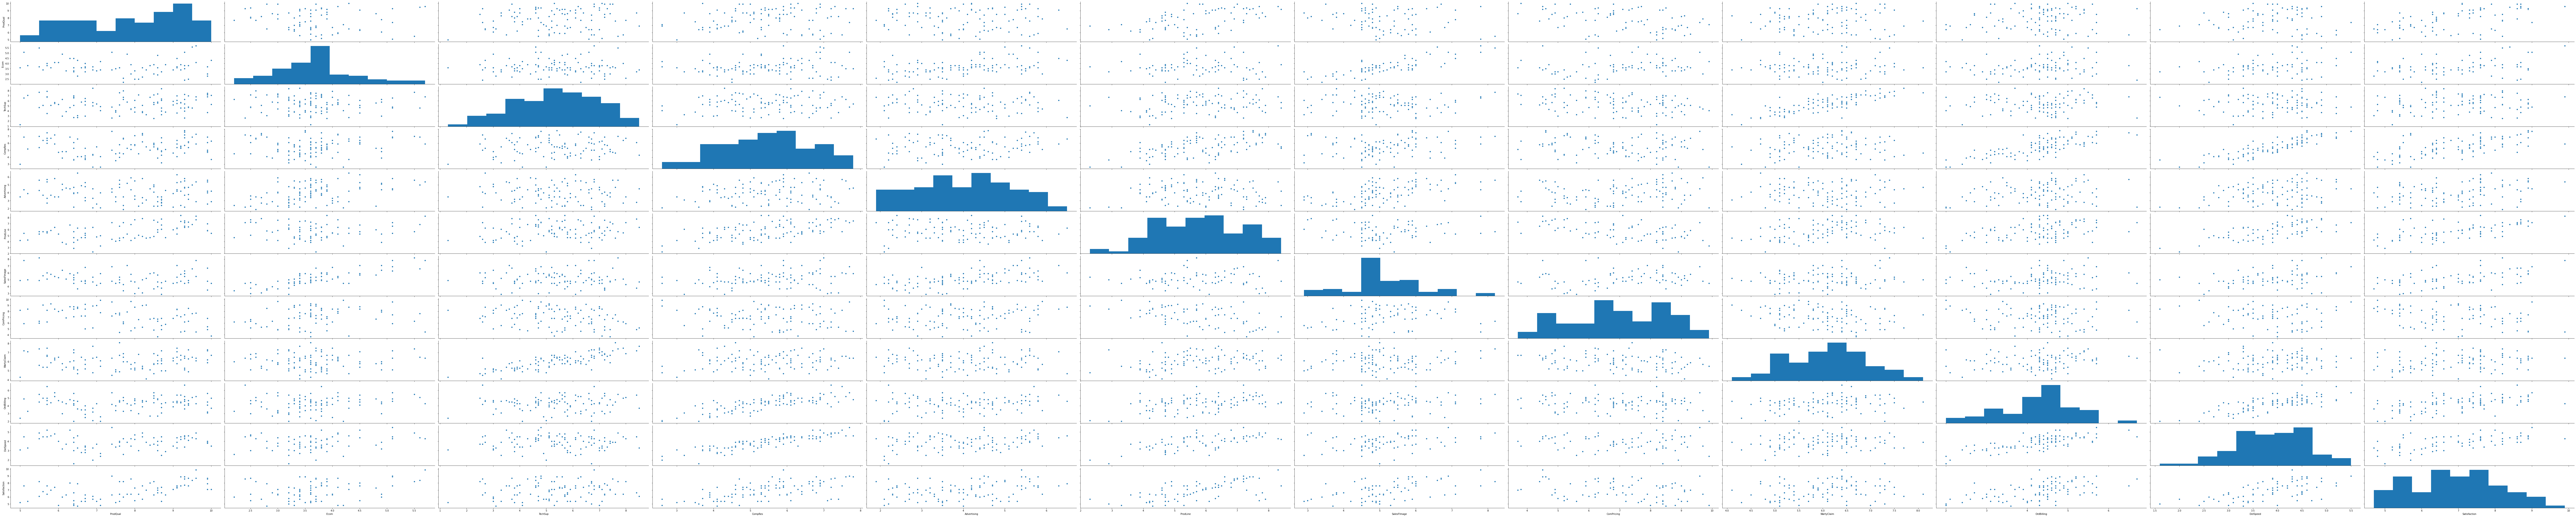

In [20]:
sns.pairplot(df)

# 4. Build the correlation matrix. Also, visualize the correlation matrix in the form of a heatmap.

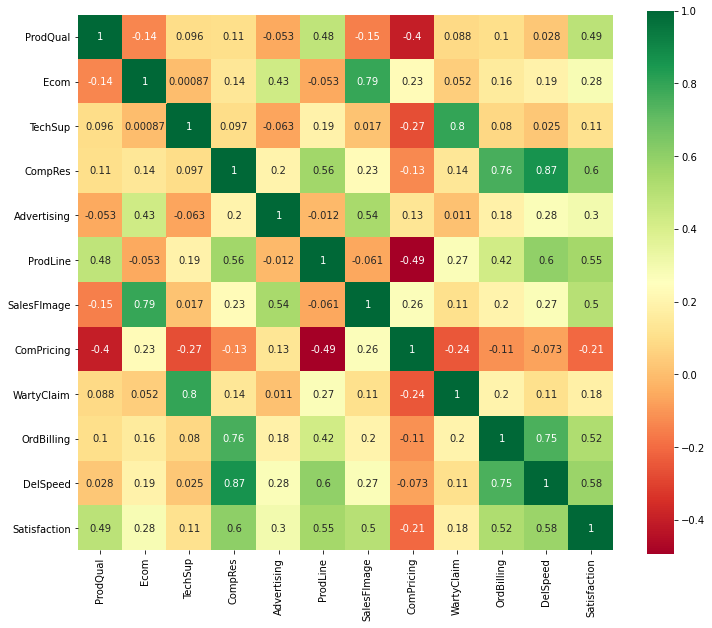

In [22]:
plt.figure(figsize = (12,10))
ax = sns.heatmap(df.corr(), annot= True, square= True, cmap = 'RdYlGn')

# 5. Build the Multiple Linear Regression model and check the $R^2$ value.

In [23]:
x = df.drop(['Satisfaction'],axis=1)
y = df['Satisfaction']

# 6. Use the Multiple Linear Regression model built in the previous step to predict dependent variable. Then calculate the Root Mean Square errors.

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 77.62602136782559%
Mean absolute error: 0.5512176898060609
Mean squared error: 0.46623393873250196
R Squared: 0.7762602136782559
Adjusted R Squared: 0.6585024314036538


### RMSE calculation.

In [27]:
print(np.sqrt(metrics.mean_squared_error(test_y,y_pred)))

0.6828132531904327


# 7. Perform Principal Component Analysis on the data and reduce the predictor variables to a suitable number of dimensions.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(5)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [30]:
x = df.drop(['Satisfaction'],axis=1)
y = df['Satisfaction']
X_proj = pca.fit_transform(x)
print (X_proj.shape)

(100, 5)


# 8. Build the correlation matrix with the reduced dimensions. Also, visualize the correlation matrix in the form of a heatmap.

In [37]:
df1 = pd.DataFrame(data = X_proj)
df1.head()

,0,1,2,3,4
0,1.212033,1.171440,2.695675,1.037184,0.741231
1,-2.668412,-0.586902,1.886073,-1.855014,0.237799
2,-3.052104,0.576044,0.775245,1.334153,1.243001
3,1.911961,-0.695028,-2.689578,-0.127693,-0.584650
4,-0.431690,-1.717791,0.686476,-0.217983,-1.091801


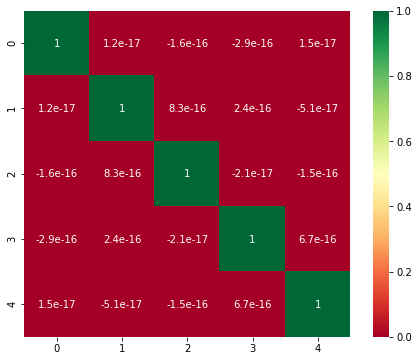

In [39]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(df1.corr(), annot= True, square= True, cmap = 'RdYlGn')

# 9. Build the Multiple Linear Regression model with the reduced number of predictor variables and check the $R^2$ value.

In [40]:
x = df1

In [41]:
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [42]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 70.35605861987122%
Mean absolute error: 0.6619038295985377
Mean squared error: 0.6177270380216524
R Squared: 0.7035605861987122
Adjusted R Squared: 0.6561302799905062


# 10. Use the Multiple Linear Regression model built in the previous step to predict dependent variable. Then calculate the Root Mean Square errors.

In [43]:
print(np.sqrt(metrics.mean_squared_error(test_y,y_pred)))

0.7859561298327359


# 11. Compare the two Multiple Linear Regression models built with respect to the RMSE and comment.

Earlier RMSE is 0.68 and after using **PCA its 0.78** 
i.e. 10% increase 

**so its better to build model without PCA in this experiment**

# END